In [1]:
import cv2

In [2]:
img=cv2.imread('pikachu.jpg')

In [3]:
img.shape

(1211, 1280, 3)

In [4]:
img=cv2.resize(img,(100,100))

In [5]:
original_shape=img.shape
img.shape

(100, 100, 3)

In [6]:
import matplotlib.pyplot as plt

#IMAGE VISUALIZATION

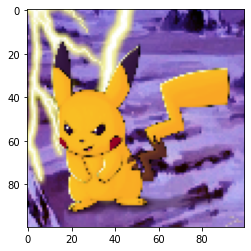

In [7]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#RESHAPING ITS SIZE TO 2 DIMENSION 

In [8]:
img=img.reshape((-1,3))
img.shape

(10000, 3)

In [9]:
from sklearn.cluster import KMeans
import numpy as np

In [10]:
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(img)

KMeans(n_clusters=4)

In [11]:
centers=km.cluster_centers_
centers

array([[244.88461538, 177.07289803,  36.16815742],
       [145.52662474, 115.10775681, 193.35849057],
       [ 66.25750395,  32.66034755,  77.98209584],
       [230.37899543, 224.5369863 , 184.11872146]])

#THESE ARE THE AVERAGE VALUES OF THE CENTERS OF THE CLUSTERS BUT TO VIEW THE COLORS , WE NEED TO CONVERT IT TO INTEGERS 

In [12]:
centers=np.array(centers,dtype='uint8')

In [13]:
print(centers)

[[244 177  36]
 [145 115 193]
 [ 66  32  77]
 [230 224 184]]


#VISUALIZING THE  DOMINANT COLORS 

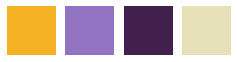

In [14]:
i=1
plt.figure(figsize=(4,2))
colors=[]
for each_col in centers:
    plt.subplot(1,4,i)
    i+=1
    plt.axis("off")
    colors.append(each_col)
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()    
    
    

#SEGMENTING OUR ORIGINAL IMAGE 

In [15]:
seg_img=np.zeros(img.shape,dtype='uint8')
seg_img.shape

(10000, 3)

In [16]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1])

#THIS WILL TELL US WHAT DOMINANT COLOR WE HAVE TO FILL AT A PARTICULAR ROW 

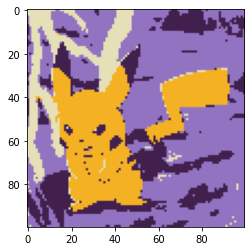

In [17]:
for i in range(seg_img.shape[0]):
    seg_img[i]=colors[km.labels_[i]]
seg_img=seg_img.reshape((original_shape))
plt.imshow(seg_img)
plt.show()    
    

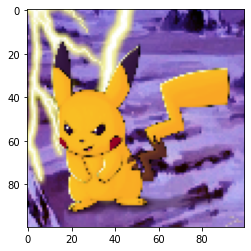

In [18]:
plt.imshow(img.reshape((original_shape)))

#YOU CAN SEE THE SEGMENTATED IMAGE AND THE ORIGINAL IMAGE 